<a href="https://colab.research.google.com/github/hapava-angel/school_x_python_learning/blob/master/NlP3_%D0%BF%D0%B5%D1%80%D0%B2%D1%8B%D0%B5_%D0%B4%D0%B2%D0%B0_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data = data.dropna()
data.head
print(data.shape)
print(list(data.columns))

(5574, 2)
['sms', 'label']


In [ ]:
data.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


0    4827
1     747
Name: label, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

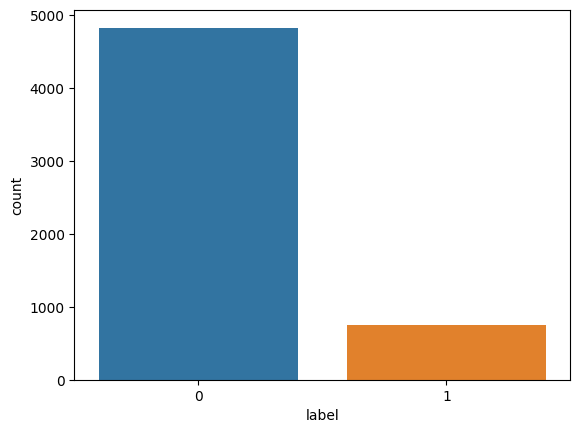

In [ ]:
print(data['label'].value_counts())
sn.countplot(x='label', data=data)
plt.show

In [ ]:
indices = data[data['label'] == 0].index[:1300]
data = data.drop(indices)
data['label'].value_counts()

0    3527
1     747
Name: label, dtype: int64

In [ ]:
a = len(data[data['label']==0])
b = len(data[data['label']==1])
pct_of_a = a/(a+b)
print("Не спам:", pct_of_a*100)
pct_of_b = b/(a+b)
print("Спам:", pct_of_b*100)

Не спам: 82.52222742161909
Спам: 17.477772578380907


Аугументация

In [ ]:
%pip install -q nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.8 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.word as naw

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet')
aug_data = []
for i, row in data.iterrows():
    if row['label'] == 1:
        sentence = row['sms']
        augmented_sentence = aug.augment(sentence)
        augmented_sentence = ' '.join(augmented_sentence)
        aug_data.append({'label': row['label'], 'sms': augmented_sentence})

augmented_dataset = pd.DataFrame(aug_data)
augmented_dataset.to_csv('augmented.csv', index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
new_data = pd.read_csv('/content/augmented.csv')

In [ ]:
new_data.head()

,label,sms
0,1,Free entry in 2 a wkly comp to win FA Loving c...
1,1,FreeMsg Hey there darling information technolo...
2,1,WINNER! ! As a valued web customer you have be...
3,1,Had your mobile eleven months or more? Atomic ...
4,1,SIX chances to win hard currency! From 100 to ...


In [ ]:
data.head(-10)

,sms,label
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
5559,No. I meant the calculation is the same. That ...,0
5560,"Sorry, I'll call later\n",0
5561,if you aren't here in the next &lt;#&gt; hou...,0
5562,Anything lor. Juz both of us lor.\n,0


In [ ]:
dfa = new_data.append(data, ignore_index = True )
dfa.to_csv('dfa.csv', index=False)


<ipython-input-15-edf360f1ded7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfa = new_data.append(data, ignore_index = True )


In [ ]:
dfa.head(-10)

,label,sms
0,1,Free entry in 2 a wkly comp to win FA Loving c...
1,1,FreeMsg Hey there darling information technolo...
2,1,WINNER! ! As a valued web customer you have be...
3,1,Had your mobile eleven months or more? Atomic ...
4,1,SIX chances to win hard currency! From 100 to ...
...,...,...
5006,0,No. I meant the calculation is the same. That ...
5007,0,"Sorry, I'll call later\n"
5008,0,if you aren't here in the next &lt;#&gt; hou...
5009,0,Anything lor. Juz both of us lor.\n


In [ ]:
a = len(dfa[dfa['label']==0])
b = len(dfa[dfa['label']==1])
pct_of_a = a/(a+b)
print("Не спам:", pct_of_a*100)
pct_of_b = b/(a+b)
print("Спам:", pct_of_b*100)

Не спам: 70.24497112129058
Спам: 29.75502887870942


Предобработка текста

0    3527
1    1494
Name: label, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

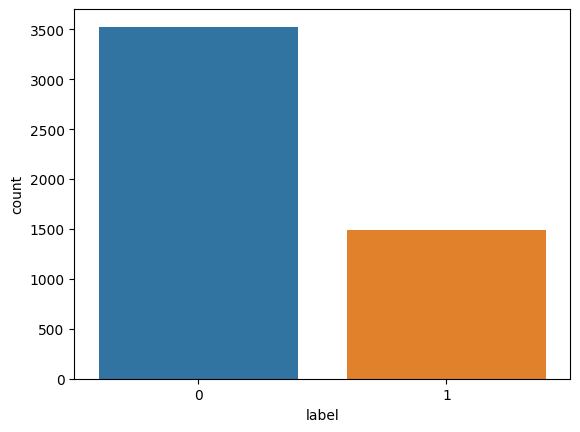

In [ ]:
print(dfa['label'].value_counts())
sn.countplot(x='label', data=dfa)
plt.show

In [ ]:
import nltk
import re
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def predobrabotka(data):
  corpus = []
  if isinstance(data, str): # для string object
    data = [data]

  for i in range(len(data)):
    data_sms = re.sub('[^a-zA-Z]', ' ', data[i]).lower()
    # print(data_sms)
    tokens = nltk.word_tokenize(data_sms)
    stop = stopwords.words('english')
    cleaned_tokens = [word for word in tokens if not word in stop]
    tags = ' '.join(cleaned_tokens)
    # print(tags)
    corpus.append(tags)
  return corpus
corpus = predobrabotka(dfa['sms'])
# print(corpus)
dfa = dfa.assign(tokenized=corpus)

In [ ]:
dfa.head()

,label,sms,tokenized
0,1,Free entry in 2 a wkly comp to win FA Loving c...,free entry wkly comp win fa loving cup final t...
1,1,FreeMsg Hey there darling information technolo...,freemsg hey darling information technology wor...
2,1,WINNER! ! As a valued web customer you have be...,winner valued web customer pick receivea prize...
3,1,Had your mobile eleven months or more? Atomic ...,mobile eleven months atomic number r entitled ...
4,1,SIX chances to win hard currency! From 100 to ...,six chances win hard currency twenty pounds tx...


In [ ]:
X = dfa['tokenized']
Y = dfa['label']

Эмбэдинг

In [ ]:
X_train,X_test,y_train,y_test = train_test_split (X, Y, test_size=0.3,random_state=32)
print(y_train.value_counts())

0    2450
1    1064
Name: label, dtype: int64


In [ ]:
vector = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X_train = vector.fit_transform(X_train)
X_train = tfidf_transformer.fit_transform(X_train)
X_test = vector.transform(X_test)
X_test = tfidf_transformer.transform(X_test)

In [ ]:
print(y_test.value_counts())

0    1077
1     430
Name: label, dtype: int64


## Выбор классической модели

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
svc = SVC(probability=True)
neighbors = KNeighborsClassifier()
multinomial = MultinomialNB()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
regression = LogisticRegression()

In [ ]:
dict_of_classic_models = {'SVC' : svc,'KNeighborsClassifier' : neighbors, 'MultinomialNB': multinomial, 'DecisionTreeClassifier': decisiontree, 'LogisticRegression': regression, 'RandomForestClassifier': randomforest}

In [ ]:
for k,c in dict_of_classic_models.items():
  c.fit(X_train, y_train)

In [ ]:
def train(clf, train_inputs, train_outputs):
    clf.fit(train_inputs, train_outputs)

In [ ]:
pred_scores = []
conf_matrix = []
report = []
for k,c in dict_of_classic_models.items():
    train(c, X_train, y_train)
    pred = c.predict(X_test)
    pred_scores.append((k, [accuracy_score(y_test , pred)]))
    conf_matrix.append((k, metrics.confusion_matrix(y_test, pred)))
    report.append((k, classification_report(y_test, pred)))

for k, matrix in conf_matrix:
  # print(matrix)
  print(f'{k}:\n'
        f'Истинно-положительных предсказаний: {matrix[0][0]}\n',
        f'Истинно-отрицательные прогнозы: {matrix[0][1]}\n',
        f'Ложно-положительные прогнозы: {matrix[1][0]}\n',
        f'Ложно-отрицательные прогнозы: {matrix[1][1]}')

for score in pred_scores:
  print(score)


SVC:
Истинно-положительных предсказаний: 1073
 Истинно-отрицательные прогнозы: 4
 Ложно-положительные прогнозы: 19
 Ложно-отрицательные прогнозы: 411
KNeighborsClassifier:
Истинно-положительных предсказаний: 1076
 Истинно-отрицательные прогнозы: 1
 Ложно-положительные прогнозы: 247
 Ложно-отрицательные прогнозы: 183
MultinomialNB:
Истинно-положительных предсказаний: 1070
 Истинно-отрицательные прогнозы: 7
 Ложно-положительные прогнозы: 29
 Ложно-отрицательные прогнозы: 401
DecisionTreeClassifier:
Истинно-положительных предсказаний: 1033
 Истинно-отрицательные прогнозы: 44
 Ложно-положительные прогнозы: 38
 Ложно-отрицательные прогнозы: 392
LogisticRegression:
Истинно-положительных предсказаний: 1070
 Истинно-отрицательные прогнозы: 7
 Ложно-положительные прогнозы: 49
 Ложно-отрицательные прогнозы: 381
RandomForestClassifier:
Истинно-положительных предсказаний: 1071
 Истинно-отрицательные прогнозы: 6
 Ложно-положительные прогнозы: 17
 Ложно-отрицательные прогнозы: 413
('SVC', [0.9847378

In [ ]:
for k, rep in report:
   print(f'{k}\n',
         f'{rep}')

SVC
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1077
           1       0.99      0.96      0.97       430

    accuracy                           0.98      1507
   macro avg       0.99      0.98      0.98      1507
weighted avg       0.98      0.98      0.98      1507

KNeighborsClassifier
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      1077
           1       0.99      0.43      0.60       430

    accuracy                           0.84      1507
   macro avg       0.90      0.71      0.75      1507
weighted avg       0.87      0.84      0.81      1507

MultinomialNB
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1077
           1       0.98      0.93      0.96       430

    accuracy                           0.98      1507
   macro avg       0.98      0.96      0.97      1507
weighted avg       0.98      0.9

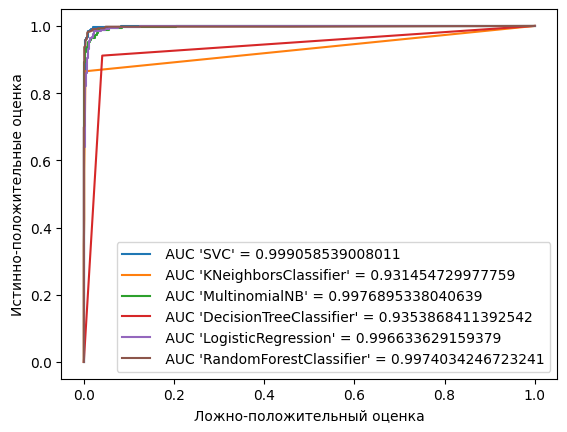

In [ ]:
plt.figure()
for model_name, model in dict_of_classic_models.items():
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot (fpr,tpr,label= f" AUC '{model_name}' = "+str(auc))
  plt.legend(loc=4)
  plt.xlabel("Ложно-положительный оценка")
  plt.ylabel("Истинно-положительные оценка")
plt.show()

In [ ]:
# sample = "thanks for all your answers guys i know i should have checked the rsync manual but i would rather ge..."
# sample = 'You’ve been selected to receive a free gift!'
# sample = "Congratulations! You've been selected for a free vacation. Click here to claim your prize and enjoy a luxury getaway to a tropical paradise. Don't miss out!"
sample = "Hello [Your Name], we're excited to inform you that you've won a complimentary vacation package to a beautiful destination. Click the link to redeem your prize and start planning your dream getaway. We can't wait for you to experience the luxury and relaxation of this amazing trip!"
tokenized_sample = predobrabotka(sample)
X = vector.transform(tokenized_sample)
X = tfidf_transformer.transform(X)
X_test
for k,c in dict_of_classic_models.items():
  pred = c.predict(X)
  print(k, pred)


SVC [0]
KNeighborsClassifier [0]
MultinomialNB [1]
DecisionTreeClassifier [1]
LogisticRegression [0]
RandomForestClassifier [1]


Я протестила несколько примеров. Первый был не спамом и модель определила правильно, а затем я стала давать спамовые сообщения, но всё менее очевидные, и как можно видеть по выводам, только MultinomialNB и RandomForestClassifier правильно определили label.
 Хотя цифры показывали, что наиболее точными моедли - это SVC и RandomForestClassifier.
Таким образом самая точная модель-  RandomForestClassifier.

## Нейронная сеть

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [232]:
X = dfa.sms.values
Y = dfa.label.values

In [233]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer(num_words=1000)
t.fit_on_texts(X)
X = t.texts_to_matrix(X, mode='tfidf')

In [234]:
print(X)

[[0.         2.78640787 0.         ... 0.         0.         0.        ]
 [0.         2.24805632 1.51920367 ... 0.         0.         0.        ]
 [0.         2.24805632 1.51920367 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.32773828 0.         ... 0.         0.         0.        ]
 [0.         1.32773828 0.         ... 0.         0.         0.        ]]


In [235]:
X.shape

(5021, 1000)

In [236]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, shuffle=True, random_state=34)

In [237]:
x_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(Y_train)
y_test = torch.LongTensor(Y_test)

In [238]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size = 128, output_size = 2):
        super(Model, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size , hidden_size)
        self.l3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = self.l3(out)
        return out

In [239]:
input_size = x_train.shape[1]
model = Model(input_size)
print(model)

Model(
  (l1): Linear(in_features=1000, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=2, bias=True)
)


In [240]:
X_train.shape
Y_train.shape

(3765,)

In [241]:
X_test.shape

(1256, 1000)

In [242]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Тренировка модели














In [243]:
epochs = 2500
x_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(Y_train)).long()
model.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    pred = torch.max(y_pred, 1)[1].numpy()
    accuracy = accuracy_score(Y_train, pred)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 250 == 0:
      print(f'Эпоха [{epoch + 1}/{epochs}], Потери: {loss}, Accuracy: {accuracy}')
print('Итоговая точность', accuracy)


Эпоха [250/2500], Потери: 0.5396063327789307, Accuracy: 0.7062416998671979
Эпоха [500/2500], Потери: 0.21773555874824524, Accuracy: 0.9644090305444887
Эпоха [750/2500], Потери: 0.09297817945480347, Accuracy: 0.9824701195219123
Эпоха [1000/2500], Потери: 0.05737420171499252, Accuracy: 0.9883134130146083
Эпоха [1250/2500], Потери: 0.040258727967739105, Accuracy: 0.9917662682602921
Эпоха [1500/2500], Потери: 0.030222421512007713, Accuracy: 0.9938911022576361
Эпоха [1750/2500], Потери: 0.023695675656199455, Accuracy: 0.9954847277556441
Эпоха [2000/2500], Потери: 0.01918097399175167, Accuracy: 0.9968127490039841
Эпоха [2250/2500], Потери: 0.015914564952254295, Accuracy: 0.99734395750332
Эпоха [2500/2500], Потери: 0.013439847156405449, Accuracy: 0.9976095617529881
Итоговая точность 0.9976095617529881


In [244]:
epochs = 200
model.eval()
net_out = model(x_test).squeeze()
for epoch in range(epochs):
    with torch.no_grad():
        y_pred = model(x_test)
        loss = criterion(y_pred, y_test)
        pred = torch.max(y_pred, 1)[1].numpy()
        accuracy = accuracy_score(Y_test, pred)
print(pred)
print(Y_test)
print(f' Потери: {loss}, Accuracy: {accuracy}')


[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]
 Потери: 0.06200330704450607, Accuracy: 0.9800955414012739


In [107]:
from sklearn.metrics import roc_curve, roc_auc_score

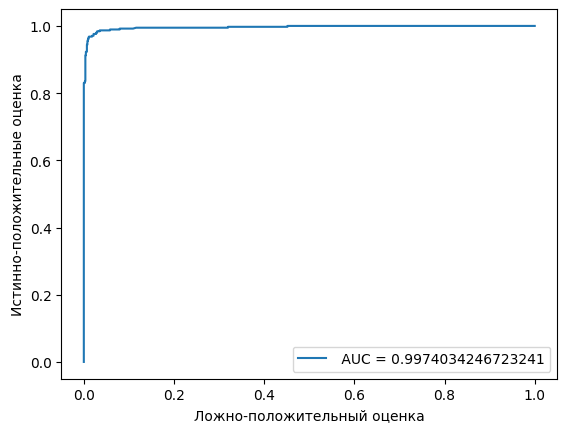

In [245]:
softmax = F.softmax(net_out, dim=1)
probabilities = softmax.detach().cpu().numpy()
auc_score = roc_auc_score(Y_test, probabilities[:, 1])
fpr, tpr, _ = roc_curve(Y_test, probabilities[:, 1])
plt.plot (fpr,tpr,label= f" AUC = "+str(auc))
plt.xlabel("Ложно-положительный оценка")
plt.ylabel("Истинно-положительные оценка")
plt.legend(loc=4)
plt.show()